<a href="https://colab.research.google.com/github/Sheetal25-pixel/end-to-end/blob/main/Text_Detection_and_Extraction_using_OpenCV_and_OCR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install opencv-python
!pip install pytesseract
!sudo apt-get install tesseract-ocr

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 49 not upgraded.
Need to get 4,816 kB of archives.
After this operation, 15.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-eng all 1:4.00~git30-7274cfa-1.1 [1,591 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-osd all 1:4.00~git30-7274cfa-1.1 [2,990 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr amd64 4.1.1-2.1build1 [236 kB]
Fetched 4,816 kB in 1s (3,635 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debc

In [ ]:
# Import required packages
import cv2
import pytesseract

# Mention the installed location of Tesseract-OCR in your system
pytesseract.pytesseract.tesseract_cmd = '/bin/tesseract'  # In case using colab after installing above modules

# Read image from which text needs to be extracted
img = cv2.imread("sample.jpg")

# Preprocessing the image starts

# Convert the image to gray scale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Performing OTSU threshold
ret, thresh1 = cv2.threshold(gray, 0, 255, cv2.THRESH_OTSU | cv2.THRESH_BINARY_INV)

# Specify structure shape and kernel size.
# Kernel size increases or decreases the area
# of the rectangle to be detected.
# A smaller value like (10, 10) will detect
# each word instead of a sentence.
rect_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (18, 18))

# Applying dilation on the threshold image
dilation = cv2.dilate(thresh1, rect_kernel, iterations = 1)

# Finding contours
contours, hierarchy = cv2.findContours(dilation, cv2.RETR_EXTERNAL,
                                                 cv2.CHAIN_APPROX_NONE)

# Creating a copy of image
im2 = img.copy()

# A text file is created and flushed
file = open("recognized.txt", "w+")
file.write("")
file.close()

# Looping through the identified contours
# Then rectangular part is cropped and passed on
# to pytesseract for extracting text from it
# Extracted text is then written into the text file
for cnt in contours:
    x, y, w, h = cv2.boundingRect(cnt)

    # Drawing a rectangle on copied image
    rect = cv2.rectangle(im2, (x, y), (x + w, y + h), (0, 255, 0), 2)

    # Cropping the text block for giving input to OCR
    cropped = im2[y:y + h, x:x + w]

    # Open the file in append mode
    file = open("recognized.txt", "a")

    # Apply OCR on the cropped image
    text = pytesseract.image_to_string(cropped)

    # Appending the text into file
    file.write(text)
    file.write("\n")

    # Close the file
    file.close()

# This code is modified by Susobhan Akhuli

Number of contours found: 1
Contour bounding box: x=0, y=0, w=270, h=148
Extracted Text: ' 

 

Best.
Summer.
Ever.

 

 
'


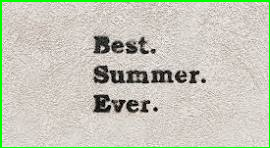

In [ ]:
import cv2
import pytesseract
from google.colab.patches import cv2_imshow

# Mention the installed location of Tesseract-OCR in your system
pytesseract.pytesseract.tesseract_cmd = '/usr/bin/tesseract'  # Adjust this path if necessary

# Read image from which text needs to be extracted
img = cv2.imread("download.jpg")

# Check if image was loaded successfully
if img is None:
    print("Error: Image not found or unable to load.")
else:
    # Preprocessing the image starts

    # Convert the image to gray scale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Adaptive thresholding for better results
    thresh1 = cv2.adaptiveThreshold(gray, 255,
                                    cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                    cv2.THRESH_BINARY_INV, 11, 2)

    # Specify structure shape and kernel size.
    rect_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (18, 18))

    # Applying dilation on the threshold image
    dilation = cv2.dilate(thresh1, rect_kernel, iterations=1)

    # Finding contours
    contours, hierarchy = cv2.findContours(dilation, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

    print(f"Number of contours found: {len(contours)}")

    # Creating a copy of image for drawing rectangles
    im2 = img.copy()

    # Open a text file for writing recognized text
    with open("recognized.txt", "w") as file:
        # Looping through the identified contours
        for cnt in contours:
            x, y, w, h = cv2.boundingRect(cnt)
            print(f"Contour bounding box: x={x}, y={y}, w={w}, h={h}")

            if w > 0 and h > 0:  # Check for valid dimensions before cropping
                rect = cv2.rectangle(im2, (x, y), (x + w, y + h), (0, 255, 0), 2)

                # Cropping the text block for giving input to OCR
                cropped = im2[y:y + h, x:x + w]

                # Save cropped images for debugging if needed
                cv2.imwrite(f"cropped_{x}_{y}.png", cropped)

                # Apply OCR on the cropped image
                text = pytesseract.image_to_string(cropped)

                # Print extracted text for debugging
                print(f"Extracted Text: '{text}'")

                # Write extracted text into file if not empty
                if text.strip():  # Only write non-empty strings
                    file.write(text + "\n")
            else:
                print("Invalid bounding box for cropping.")

    # Show final image with rectangles drawn around detected areas
    cv2_imshow(im2)


## Process Multiple Images

In [13]:
from google.colab import files

uploaded = files.upload()


Saving download.jpg to download (1).jpg
